In [8]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io
from sklearn.impute import KNNImputer

url = "https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%204%20-%20Data%20Understanding/W4D5%20-%20Mini%20project/Wine%20Quality%20dataset.zip"

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("data")

# How do Different Chemical Properties Correlate with the Quality of Wine?

In [9]:
# Loading the Wine Quality Dataset
quality_data = pd.read_csv('.\data\Wine Quality dataset\winequality-red.csv')

# Basic Info on Columns
quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
# Information on the spread of Numeric Columns
quality_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


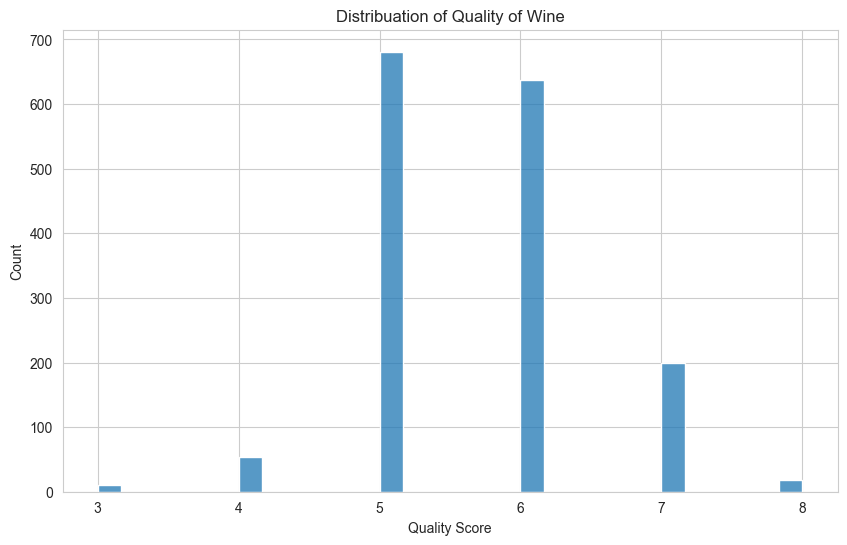

In [14]:
# Visual Representation of Distribution
plt.figure(figsize=(10,6))
sns.histplot(quality_data['quality'])
plt.title("Distribuation of Quality of Wine")
plt.xlabel('Quality Score')
plt.show()

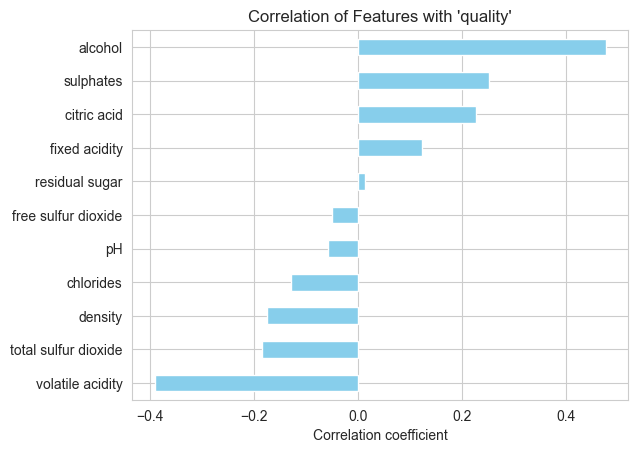

In [19]:
# Using a Correlation Matrix
# Compute Correlation of all columns with 'quality'
correlation_matrix = quality_data.corr(numeric_only=True)['quality'].drop('quality')

# Use Bar Plot to Visualize Correlations
correlation_matrix.sort_values().plot(kind='barh', color='skyblue')
plt.title("Correlation of Features with 'quality'")
plt.xlabel("Correlation coefficient")
plt.show()


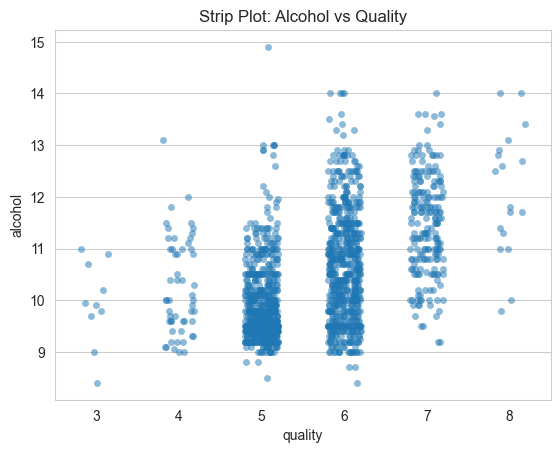

In [32]:
# Bivariate Distribution of Quality vs. Alcohol Level
sns.stripplot(x="quality", y="alcohol", data=quality_data, jitter=0.2, alpha=0.5)
plt.title("Strip Plot: Alcohol vs Quality")
plt.show()

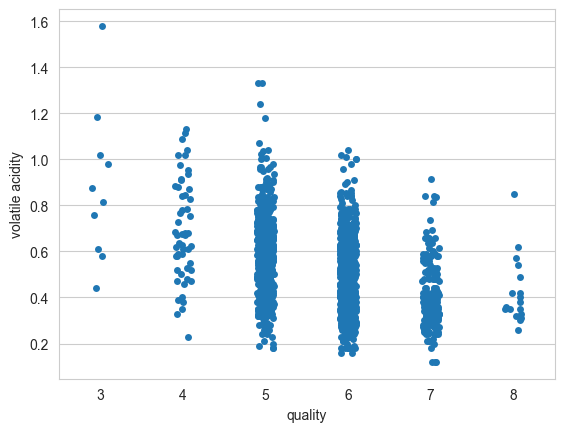

In [34]:
# Bivariate Distribution of Quality vs. Acidity
sns.stripplot(x='quality', y='volatile acidity', data=quality_data)
plt.show()

Conclusions:
* Alcohol Level had the strongest positive corellation with quality score (0.45), with the highest quality wines having an alcohol level between 10 and 14; meaning the most high quality wines have a balanced level of alcohol.
* Volatile Acidity Level had the strongest negative correlation with quality score, meaning that the more acidic a wine was, the lower it's quality is.

# Is there a significant difference in quality between red and white wines?

In [35]:
url = "https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%204%20-%20Data%20Understanding/W4D5%20-%20Mini%20project/Red%20and%20White%20Wine.zip"

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("data")

In [37]:
redwhite = pd.read_csv('.\data\Red and White Wine\wine-quality-white-and-red.csv')
print(redwhite.info())
print(redwhite.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
    type  fixed acidity  volatile acidity  citric acid  re

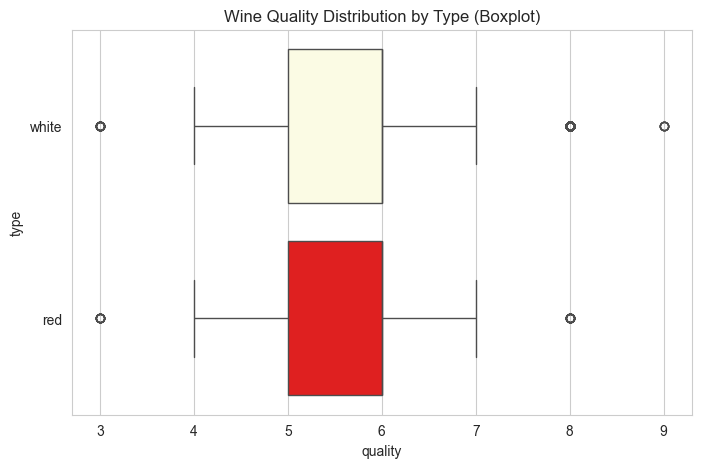

In [47]:
# Quality Distribution for both Red and White
plt.figure(figsize=(8,5))
sns.boxplot(x='quality', y='type', data=redwhite, palette=['lightyellow', 'red'], orient='h')
plt.title("Wine Quality Distribution by Type (Boxplot)")
plt.show()

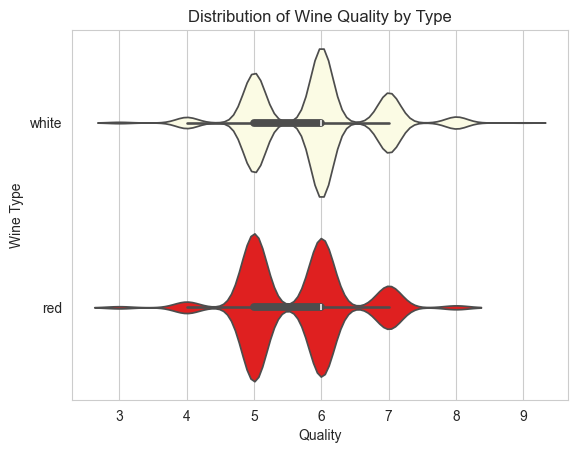

In [48]:
sns.violinplot(data=redwhite, x='quality', y='type', palette=['lightyellow', 'red'])
plt.title("Distribution of Wine Quality by Type")
plt.xlabel("Quality")
plt.ylabel("Wine Type")
plt.show()

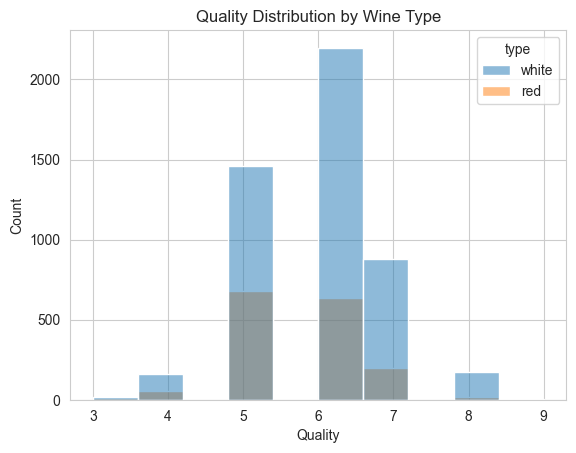

In [51]:
sns.histplot(data=redwhite, x='quality', hue='type', bins=10, kde=False)
plt.title("Quality Distribution by Wine Type")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()